# **Lab2 task**

Use pytorch/Tensorflow to implement an specific classification DNN model, dataset Fashion MNIST

1.   Design model by keras.sequential model, 3 layer of CNN network (10%), 3 layer of NN network (10%)

1.   Comparison w/ and w/o Batch Normalizatoin Layer (10%)

1.   Comparison w/ arbitrary layer of abovementioned CNN network. (10%)

1.   Print model summary and plot model (10%)

1.   Print test accuracy, plot train-epoch, val-epoch, train-loss, val-loss (20%)
2.   Plot certain image from dataset and successively predict (10%)

1.   Report(30%)


**Q&A: course.aislab@gmail.com**








In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd /content/drive/MyDrive/EAI/Lab2

/content/drive/MyDrive/EAI/Lab2


# Import from framework

In [34]:
!pip install utils
!pip install torchviz
!pip install torchsummary
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.datasets.mnist import load_data
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow.keras.utils import plot_model
from torch.autograd import Variable
from torchsummary import summary
from torchviz import make_dot
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

# Hyper Parameters

In [35]:
EPOCH = 10
BATCH_SIZE = 50
LR = 0.075

# Load dataset

In [36]:
# Load MNIST dataset
# Keras images are 28x28 array rather than a 1D array of size 784
# Pixels intensities are integers (0 to 255) rather than floats (0.0 to 255.0)

#dataset
train_data = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=torchvision.transforms.ToTensor())    #0~1
test_data = torchvision.datasets.MNIST(root='./mnist', train=False, download=True, transform=torchvision.transforms.ToTensor())


################################TA######################################
train_x = train_data.train_data.numpy()
train_y = train_data.train_labels.numpy()
train_y = train_y.reshape(-1,1)
test_x = test_data.test_data.numpy()
test_y = test_data.test_labels.numpy()
test_y = test_y.reshape(-1,1)
################################TA######################################


# split validation
train_size = 55000
val_size = 5000
test_size = 10000
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])


#loader
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = Data.DataLoader(dataset=val_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)    #batch_size need???  can accerlerate by AOC

################################TA######################################

# (train_x, train_y), (test_x, test_y) = load_data()

# train_x = train_x.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
# test_x = test_x.reshape(-1, 28, 28, 1)

train_x = train_x.astype('float32') / 255.0 # Normalization
test_x = test_x.astype('float32') / 255.0

train_y = train_y.reshape(-1,1)
test_y  = test_y.reshape(-1,1)

# print(train_y)
# print('#####################################')



# train_x.shape
# print(train_y)

################################TA######################################


# Dataset already split in Training and Testing
# Train_x for images and train_y for labels
#shape of train_x should be (6000, 28, 28, 1), which is (class, height, width, channel)
#shape of train_y should be (6000, 1), which is (class, channel(only needs one to store class info))

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


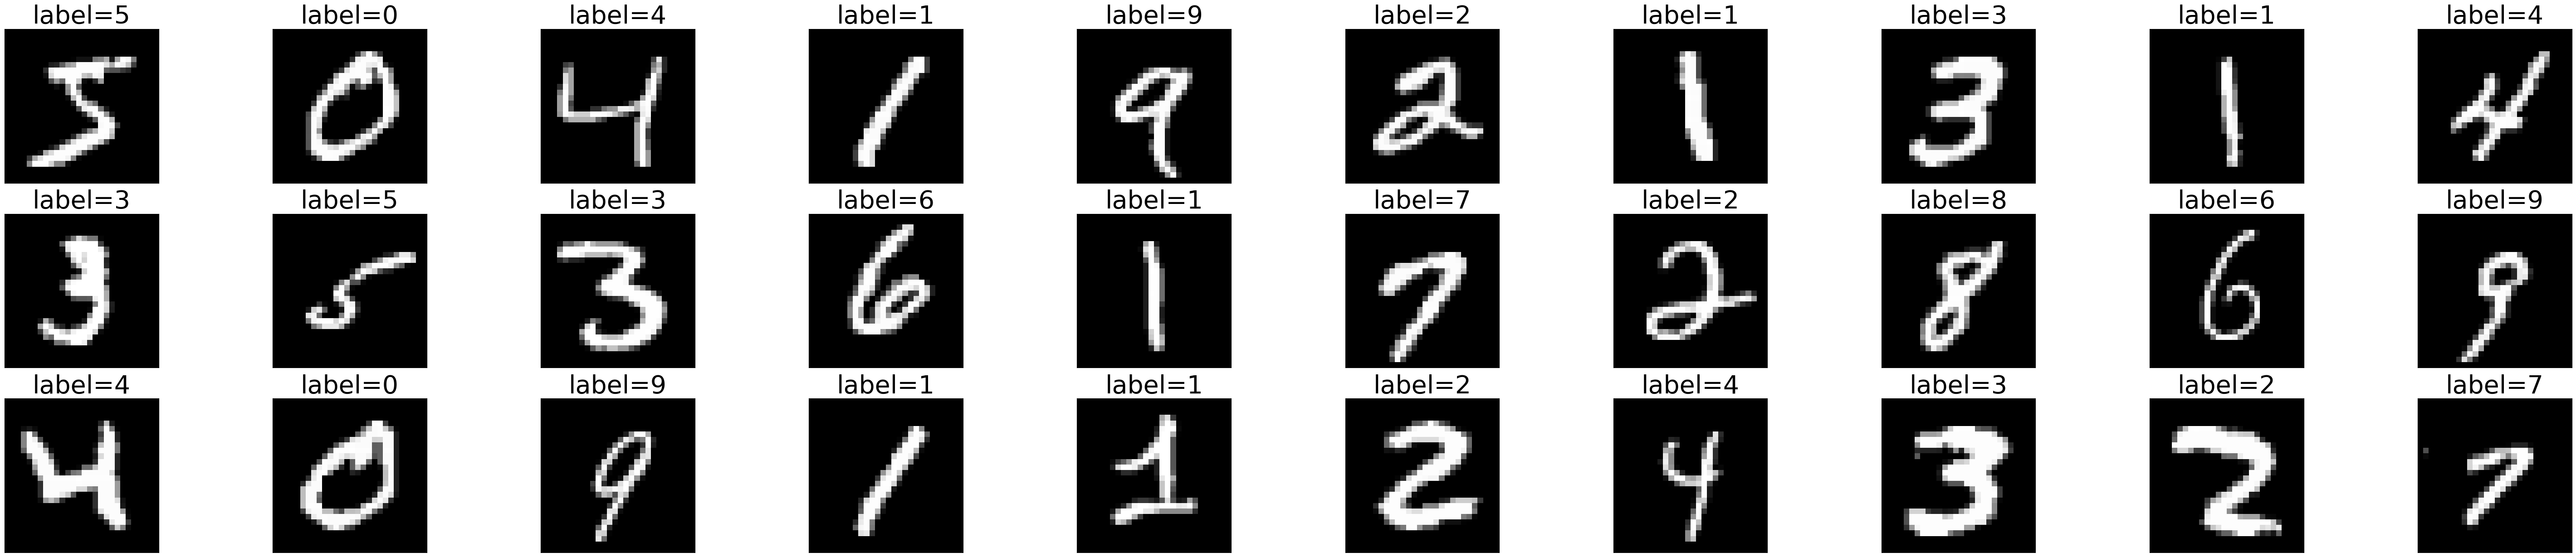

In [37]:
#show some image from MNIST dataset
imageMNIST = plt.figure(figsize=(75,15))
for i in range (30):
  ax = imageMNIST.add_subplot(3,10, i+1, xticks=[], yticks=[]) # remove xticks and yticks
  ax.imshow(np.squeeze(train_x[i]), cmap='gray')
  ax.set_title('label=' + str(train_y[i][0]), fontsize=40)

In [38]:
#Settings:
#inputShape = (height,width,depth)

# InputShape = (-1,1,28,28)
# classes =
# validation_split =
#show input shape
# print(InputShape)

# Create your own model

In [102]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")

class CNN_NN(nn.Module):
  def __init__(self):
    super(CNN_NN,self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(3,3),stride=1, padding=1 ), #(1,1)  padding for corner detect
        nn.BatchNorm2d(6),
        nn.Dropout(p=0.75),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3),stride=1, padding=0 ), #(1,1)
        nn.BatchNorm2d(12),
        nn.Dropout(p=0.75),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(in_channels=12,out_channels=24,kernel_size=(3,3),stride=1, padding=0 ), #(1,1)
        nn.BatchNorm2d(24),
        nn.Dropout(p=0.75),
        nn.ReLU(),
        #nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)) too less FC input
    )
    self.fc1 = nn.Sequential(
        nn.Linear(24*4*4,128),
        nn.BatchNorm1d(128),
        nn.ReLU()
    )
    self.fc2 = nn.Sequential(
        nn.Linear(128,48),
        nn.BatchNorm1d(48),
        nn.ReLU()
    )
    self.fc3 = nn.Sequential(
        nn.Linear(48,10),
        #nn.BatchNorm1d(48),
        #nn.Softmax()     #no softmax because include in loss
    )
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(-1,24*4*4)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x


In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0

model =CNN_NN().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()
# input_shape = InputShape


# print summary & plot model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
       BatchNorm2d-2            [-1, 6, 28, 28]              12
           Dropout-3            [-1, 6, 28, 28]               0
              ReLU-4            [-1, 6, 28, 28]               0
         MaxPool2d-5            [-1, 6, 14, 14]               0
            Conv2d-6           [-1, 12, 12, 12]             660
       BatchNorm2d-7           [-1, 12, 12, 12]              24
           Dropout-8           [-1, 12, 12, 12]               0
              ReLU-9           [-1, 12, 12, 12]               0
        MaxPool2d-10             [-1, 12, 6, 6]               0
           Conv2d-11             [-1, 24, 4, 4]           2,616
      BatchNorm2d-12             [-1, 24, 4, 4]              48
          Dropout-13             [-1, 24, 4, 4]               0
             ReLU-14             [-1, 2

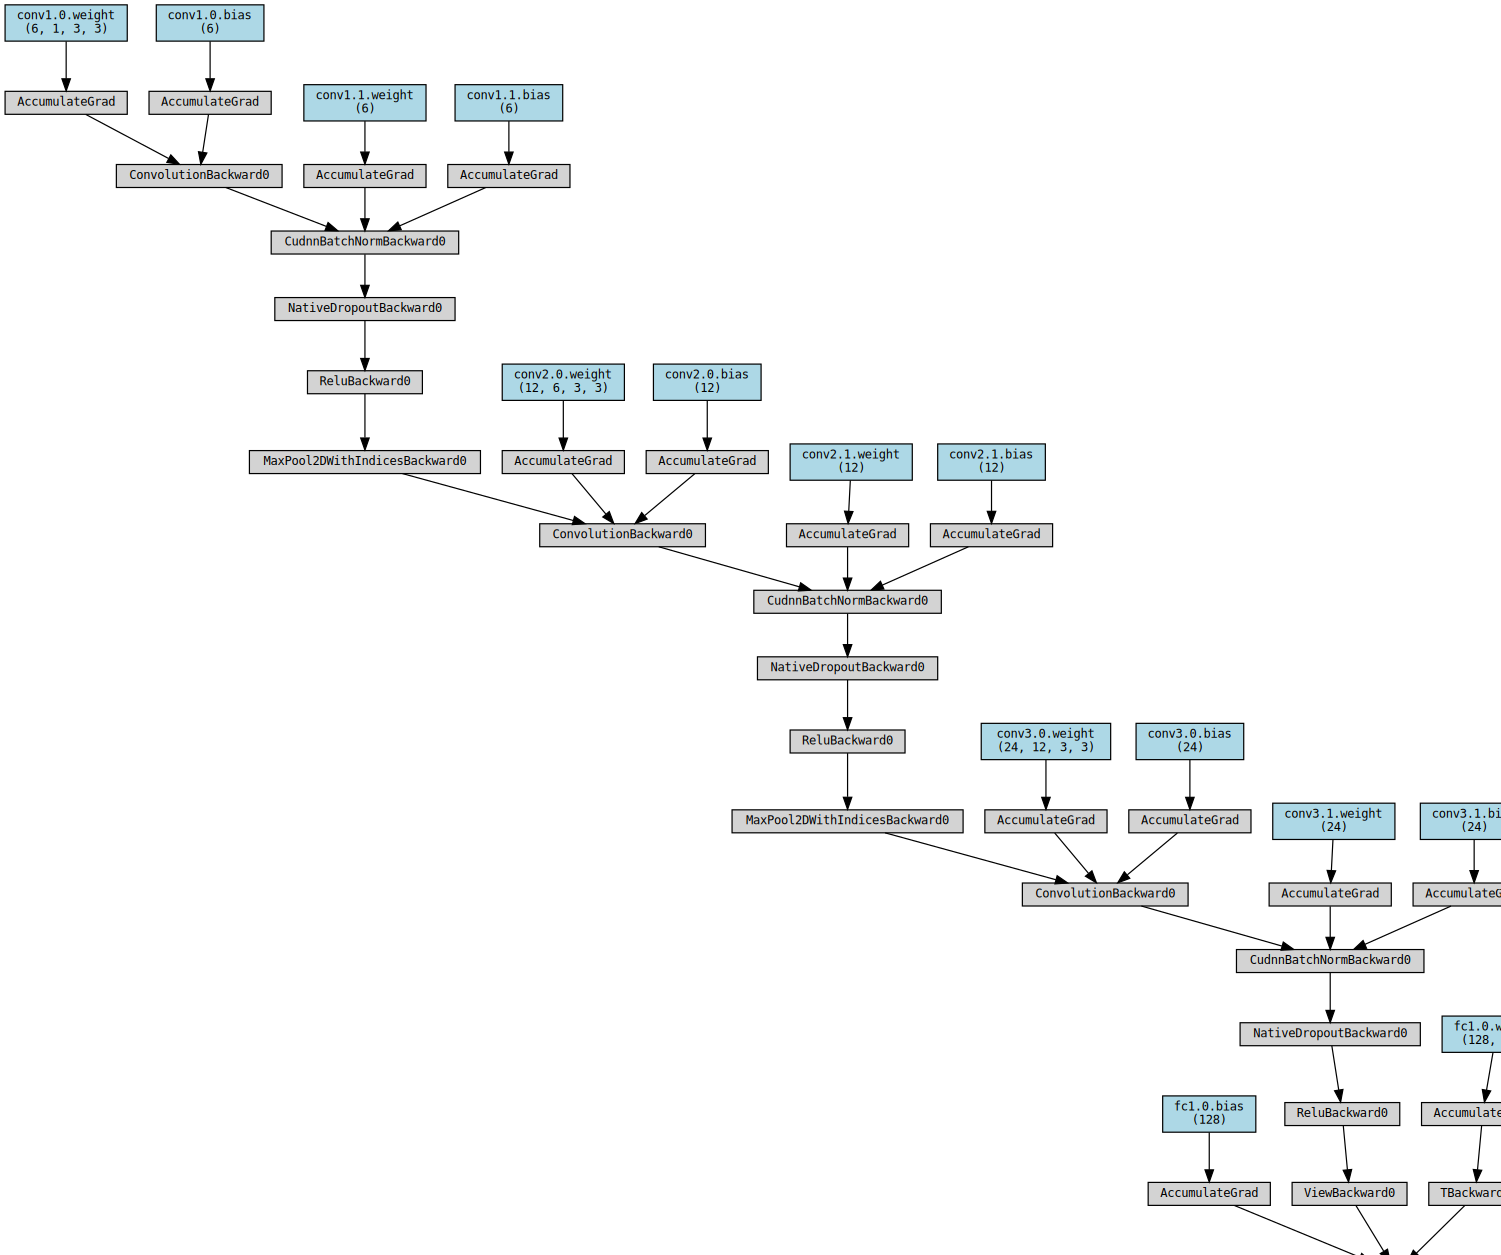

In [104]:
# print(model)
# print(torch_summarize(model))
#plot model
summary(model,(1,28,28))


dummy_input = torch.randn(BATCH_SIZE, 1, 28 ,28)
dummy_input = dummy_input.to(device)
# Pass the model and input tensor to make_dot
graph = make_dot(model(dummy_input), params=dict(model.named_parameters()))
graph.render("./sample_model_graph")
graph

# Train model

In [105]:
#model fit to train model
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []


for epoch in range(EPOCH):
  #train
  train_correct = 0
  counter = 0
  train_loss = 0.0
  for step, (batch_x,batch_y) in enumerate(train_loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)

    #forward
    train_output = model(batch_x)
    loss = loss_func(train_output, batch_y)
    #statistics
    counter += BATCH_SIZE
    train_predict = torch.max(train_output,1)[1].squeeze()  # squeeze() for eliminate only one element dim
    train_correct += sum(train_predict.cpu().numpy()==batch_y.cpu().numpy())
    train_loss += loss.item()
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # if (step+1)%100 == 0:    #print every 50*100 data , if train data=55000, one epoch will print 11 time
  #val
  val_correct = 0
  val_loss = 0.0
  for i,(batch_x,batch_y) in enumerate(val_loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    #forward
    val_output = model(batch_x)
    loss = loss_func(val_output, batch_y)
    #statistics
    val_predict = torch.max(val_output,1)[1].squeeze()
    val_correct += sum(val_predict.cpu().numpy()==batch_y.cpu().numpy())
    val_loss += loss.item()

  train_accuracy = 100.*(train_correct/train_size)
  val_accuracy = 100.*(val_correct/val_size)

  #add to history
  train_loss_history.append(train_loss/55000.)
  val_loss_history.append(val_loss/5000.)
  train_accuracy_history.append(train_accuracy)
  val_accuracy_history.append(val_accuracy)
  # train_accuracy_history = np.mean(train_accuracy_history)
  # val_accuracy_history = np.mean(val_accuracy_history)

  print('Epoch: ', epoch, ' train loss: %.4f'% train_loss, 'train accuracy: %.4f'% train_accuracy, 'val loss: %.4f' % val_loss, 'val accuracy: %.4f'% val_accuracy)

Epoch:  0  train loss: 961.2261 train accuracy: 71.2291 val loss: 68.0294 val accuracy: 78.2000
Epoch:  1  train loss: 703.7248 train accuracy: 79.4800 val loss: 58.9687 val accuracy: 81.0200
Epoch:  2  train loss: 638.5930 train accuracy: 81.2855 val loss: 55.5203 val accuracy: 81.5400
Epoch:  3  train loss: 601.3168 train accuracy: 82.4982 val loss: 53.7000 val accuracy: 81.7800
Epoch:  4  train loss: 591.5876 train accuracy: 82.7327 val loss: 50.1230 val accuracy: 84.2600
Epoch:  5  train loss: 566.6734 train accuracy: 83.4455 val loss: 53.0333 val accuracy: 83.5800
Epoch:  6  train loss: 545.8177 train accuracy: 84.0891 val loss: 53.2288 val accuracy: 82.5200
Epoch:  7  train loss: 537.9759 train accuracy: 84.3564 val loss: 48.9224 val accuracy: 84.2400
Epoch:  8  train loss: 529.6456 train accuracy: 84.6418 val loss: 46.7963 val accuracy: 84.6200
Epoch:  9  train loss: 522.4185 train accuracy: 84.8909 val loss: 49.6893 val accuracy: 83.9800


In [100]:
#save model
torch.save(model, 'CNN_NN_BN.pth')

# plot history

In [44]:
# print(type(train_correct))
# print(train_predict.type())
# print(batch_y.type())
# # print(train_loss.type())
# print(type(train_loss))

In [45]:
def show_train_history(ylabel,train,validation):
    plt.plot(train)
    plt.plot(validation)
    plt.title('Train History')
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

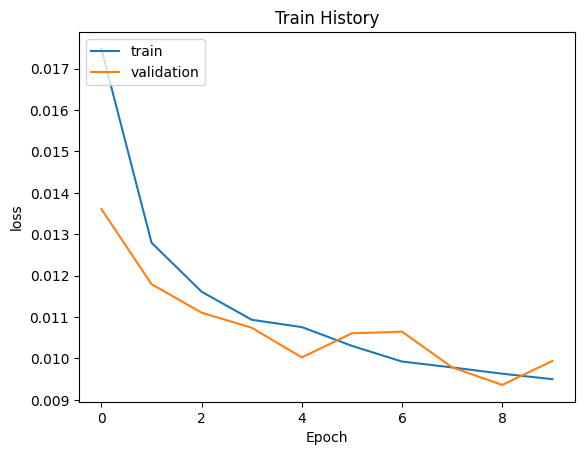

In [106]:
show_train_history('loss',train_loss_history , val_loss_history)

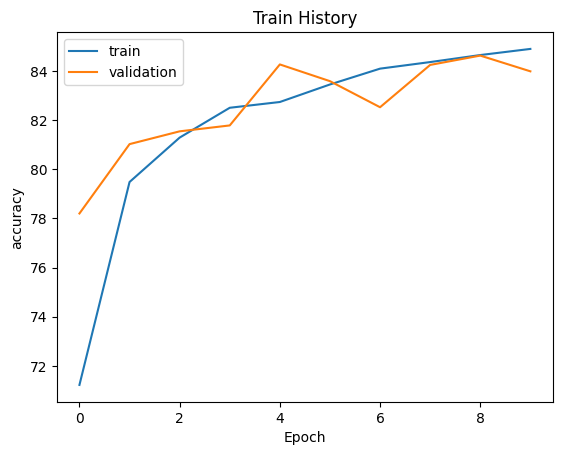

In [107]:
show_train_history('accuracy',train_accuracy_history , val_accuracy_history)

# Test model

In [108]:
#evalutate the model
test_correct = 0
test_loss = 0.0
for i,(batch_x,batch_y) in enumerate(test_loader):
  batch_x = batch_x.to(device)
  batch_y = batch_y.to(device)
  #forward
  test_output = model(batch_x)
  loss = loss_func(test_output, batch_y)
  #statistics
  test_predict = torch.max(test_output,1)[1].squeeze()
  test_correct += sum(test_predict==batch_y)
  test_loss += loss.item()

test_accuracy = 100.*(test_correct/test_size)
print('test accuracy: %.4f'% test_accuracy)

#plot and print


test accuracy: 85.5500


In [49]:
# print(type(batch_x))
# print(batch_x.shape)


# Plot certain image from dataset and successively predict

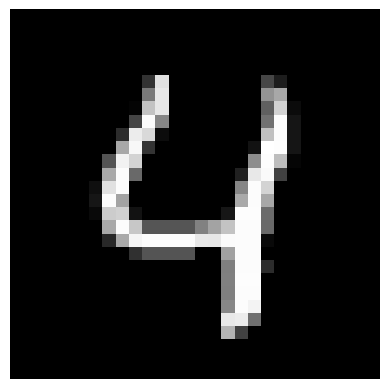

In [50]:
image1 = test_x[4] # shape = (28, 28, 1)
plt.imshow(np.squeeze(image1), cmap='gray')
plt.axis('off')
plt.show()

In [51]:
#predict result
image1 = image1.reshape(-1,1,28,28)
image1_tensor = torch.from_numpy(image1)
image1_tensor = image1_tensor.to(device)
model.eval()      #https://zhuanlan.zhihu.com/p/357075502
predict = model(image1_tensor)
print('predicted: {}'.format(np.argmax(predict.cpu().detach().numpy())))

'''
model.train() : use Batch Normalization & Dropout
model.eval() : dont use Batch Normalization & Dropout
'''

predicted: 4


'\nmodel.train() : use Batch Normalization & Dropout\nmodel.eval() : dont use Batch Normalization & Dropout\n'